Homework #2 Problem 1a

Please find the confusion matrix and ROC curve below. The training accuracy for the test set was found to be 53% while the test accuracy was found to be 48.77%. This accuracy is lower in comparrison to what was originally found from the test set shown during the project 1 submission.

In [87]:
### LOADING, CLEANING, AND SPLITTING THE DATASET ### 

# Imported Libraries for splitting data, pandas for loading data, and numpy for basic math
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import pandas as pd
import numpy as np
import matplotlib as plt

# Read in data from the csv file
Data_File_Path = '/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 1/class_test.csv'
Patient_Master_csv = pd.read_csv(Data_File_Path)

# Create a list holding all the desired feature values from the training data set
Feature_Data = Patient_Master_csv[['patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median',
                                   'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                                   'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                                   'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 
                                   'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 
                                   'veteran', 'Ozone', 'PM25', 'N02', 'DiagPeriodL90D']].copy()

# Go through all the training data, convert the selected features to integers, and drop the training data with non integer values
for Feature in Feature_Data:
    # Converts all feature values for each training data point to integers
    Feature_Data[Feature] = pd.to_numeric(Feature_Data[Feature], errors='coerce')
    # Drops all training data with non integer feature values
    Feature_Data.dropna(subset=[Feature], inplace=True)

# Test print to confirm the data looks ok
#print(Feature_Data)
    
# Selecting the features from the feature_data list
Features = ['patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median',
                                   'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                                   'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                                   'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 
                                   'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 
                                   'veteran', 'Ozone', 'PM25', 'N02']

# Selecting the target from the feature_data list
Target = 'DiagPeriodL90D'

# Split the feature and target values
X = Feature_Data[Features]
y = Feature_Data[Target]

# Split the dataset into training set and test set with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


     patient_id  DiagPeriodL90D
0      350233.0        0.778718
1      544004.0        0.102845
2      485773.0        0.725083
3      462079.0        0.804789
4      760455.0        0.747452
..          ...             ...
510    427931.0        0.798699
511    628957.0        0.748380
512    380816.0        0.786856
513    358162.0        0.764995
514    216674.0        0.791389

[515 rows x 2 columns]
Training Accuracy: 52.988% | Cross Entropy Training Error: 47.012% 
Testing Accuracy: 48.777% | Cross Entropy Testing Error: 51.223% 


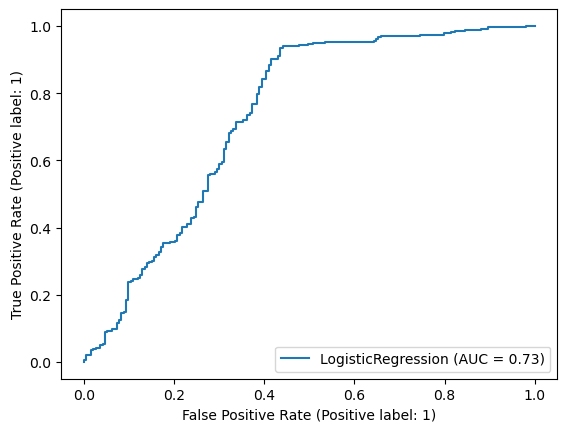

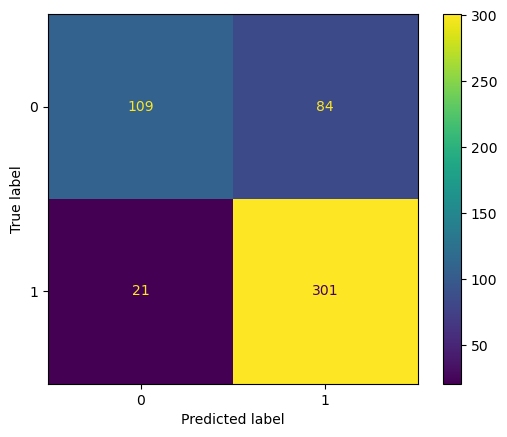

In [88]:
### FITTING DATA AND CALLING THE LOGISTIC FUNCTION ### 

# Import scikitlearn library for the logistic regression function, mean squared error loss function, and ROC curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, RocCurveDisplay

# Preset the logsitic regression function
logisticRegr = LogisticRegression(solver='lbfgs', max_iter = 250)

# Fit the logistic function using the training data found by splitting the entire set into a training and test set
logisticRegr.fit(X_train, y_train)

# Find the probabilities of a diagnosis within the next 90 days for the training and test
y_train_probabilities = logisticRegr.predict_proba(X_train)
y_test_probabilities = logisticRegr.predict_proba(X_test)

# Predict whether the patient received a diagnosis within the next 90 days. Can also be done by comparing the prediction probability
# to a threshold of 0.5 but the inbuilt predict function does this for us. Call the function for convenience.
y_train_predict = logisticRegr.predict(X_train)
y_test_predict = logisticRegr.predict(X_test)

# Create a dataframe to store the probabiltity of diagnosis in the next 90 days for each patient
Patient_Prediction_DF = pd.DataFrame(columns = ['patient_id', 'DiagPeriodL90D'])

# Set two index values
DF_Idx = 0
X_Idx = 0

# Loop through the entire test set and assign the probability for each patient according to their patient id
for patient_id in X_test['patient_id']:
    Patient_Prediction_DF.loc[DF_Idx] = [patient_id, y_test_probabilities[X_Idx][1]]
    DF_Idx += 1
    X_Idx += 1

# Test print to verify the dataframe is properly storing the patient id and associated diagnosis probability
print(Patient_Prediction_DF)

# Calculate training and testing error using the log_loss/cross-entropy loss.
Training_Error = log_loss(y_train, y_train_probabilities)
Testing_Error = log_loss(y_test, y_test_probabilities)

print('Training Accuracy: %.3f%% | Cross Entropy Training Error: %.3f%% ' % ((1-Training_Error)*100, Training_Error*100))
print('Testing Accuracy: %.3f%% | Cross Entropy Testing Error: %.3f%% ' % ((1-Testing_Error)*100, Testing_Error*100))

# Create csv file for submission
#Patient_Prediction_DF.to_csv('/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 1/kerkaus_submission.csv', index=False)

# Plot the ROC Curve given the training and testin data
RocCurveDisplay.from_estimator(logisticRegr.fit(X_train, y_train), X_test, y_test)

CMD_disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_test_predict))
CMD_disp.plot()


In [89]:
### Reevaluating the model due to low accuracy ###

# Imported libraries to varify model using k folding
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Split entire data set into 10 batches
kFold = KFold(n_splits = 10, random_state = 0, shuffle = True)

# Set the model to logistic regression
logisticRegr = LogisticRegression(solver='lbfgs', max_iter = 250)

# Compute the cross validation score using the k folded data set and the logistic regression function
results = cross_val_score(logisticRegr, X, y, cv = kFold)

# Calculate the accuarcy and error of the entire data set by taking the mean of all the batches
print('Overall Accuracy: %.3f%% | Error: %.3f%%' % (results.mean()*100, 100 - results.mean()*100))


Overall Accuracy: 81.125% | Error: 18.875%


Homework #2 Problem 1b

Explain your choice of the number of layers, hidden units, activation function etc.

1. Because we need to make a deep neural network (2 hidden layers + output layer), I decided to use the minimum amount of required layers and output layer. I used 200, 100, and 1 as my hidden units. I decided to have a large amount of hidden units in the 1st layer and half it for my second layer. The final layer must be 1 as it is the output layer for binary classification. I experimented a little on the amount of hidden units that could improve performance but ultimately decided to leave it at 200, 100, and 1. For activation functions, I used ReLU for the two hidden layers and sigmoid for the output layer. I used sigmoid as the output layer function as it would squish the output value between 0 and 1 which can be used for thresholding to conduct the classification.

Compare the neural net results to the previous results

1. When comparing the NN results to the results found from project 1 as well as problem 1a, the NN had a much higher accuracy. Project 1a using linear regression found a testing accuracy of 49.58%. Problem 1a found a testing accuracy of 48.77%. After training and testing, the NN found a test accuracy of roughly 70%. What should be noted though is the NN also had a testing loss of over 2. I'm not 100% sure why this is occurring but some research has led me to believe this can occur due to the binary cross entropy function.

Homework #2 Problem 1c

1. I wasn't able to run the winners code but I did spend time reading and tyring to understand the winners code/throught process. The biggest differences I can see with the winners code are that they take a great deal in cleaning and categorizing the data. For example, I decided to completely obmit any features that did not have a scalar output but the winner converted every feature to usable values. I also noticed that the winner used several different hyperparameter tuning to try and get the highest possible answer while I used the default hyperparameter values. Personally, I wouldn't really know how to tune the hyperparameters besides heavy test and check process which would take forever to complete. Finally, I noticed that the winner uses boosting and several different classifier techniques to increase his positive classification rate. I only used a simple thresholder to classify the patients.

    In genreal, I can see that the winner takes a great amount of time and effort in cleaning and tuning the model which allowed him to squeeze as much performance out of his model as possible and win the contest.

In [93]:
### LOADING, CLEANING, AND SPLITTING THE DATASET ### 

# Imported Libraries for splitting data, pandas for loading data, and numpy for basic math
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib as plt

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

# Read in data from the csv file
Data_File_Path = '/Users/spencerkerkau/Desktop/Coding Projects/EE 445/Project 1/class_test.csv'
Patient_Master_csv = pd.read_csv(Data_File_Path)

# Create a list holding all the desired feature values from the training data set
Feature_Data = Patient_Master_csv[['patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median',
                                   'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                                   'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                                   'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 
                                   'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 
                                   'veteran', 'Ozone', 'PM25', 'N02', 'DiagPeriodL90D']].copy()

# Go through all the training data, convert the selected features to integers, and drop the training data with non integer values
for Feature in Feature_Data:
    # Converts all feature values for each training data point to integers
    Feature_Data[Feature] = pd.to_numeric(Feature_Data[Feature], errors='coerce')
    # Drops all training data with non integer feature values
    Feature_Data.dropna(subset=[Feature], inplace=True)

# Test print to confirm the data looks ok
#print(Feature_Data)
    
# Selecting the features from the feature_data list
Features = ['patient_id', 'patient_age', 'breast_cancer_diagnosis_code', 'family_size', 'income_household_median',
                                   'home_ownership', 'housing_units', 'home_value', 'rent_median', 'rent_burden', 'education_less_highschool',
                                   'education_highschool', 'education_some_college', 'education_bachelors', 'education_graduate', 'education_college_or_above',
                                   'education_stem_degree', 'labor_force_participation', 'unemployment_rate', 'race_white', 'race_black', 'race_asian', 
                                   'race_pacific', 'race_other', 'race_multiple', 'hispanic', 'disabled', 'limited_english', 'health_uninsured', 
                                   'veteran', 'Ozone', 'PM25', 'N02']

# Selecting the target from the feature_data list
Target = 'DiagPeriodL90D'

# Split the feature and target values
X = Feature_Data[Features]
y = Feature_Data[Target]

# Split the dataset into training set and test set with 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale and fit the training and test set so for input into the model
scaler = StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)

# Transform the testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)        

## Neural Net model function
def NN_model():
    
    # Declare the model with 3 dense layers
    model = Sequential([
        # 1st layer has 200 hidden units. Input is of size [33,1] due to 33 features from input. ReLU activation function
        Dense(200, input_shape=(33,), activation='relu'),
        # 2nd layer has 100 hidden units and is fed from the 1st layer. ReLU activation function
        Dense(100, activation='relu'),
        # Output layer has 1 output and used sigmoid function to squish output between 0 and 1
        Dense(1, activation='sigmoid')
    ])

    # Use Adam optimizer with 0.01 learning rate. Loss should be crossentropy instead of MSE
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

    # Return the model
    return model

# Initialize the model
model = NN_model()

# Convert your DataFrame data to numpy arrays so it fits properly for training
X_train_np = np.array(X_train_scaled)
y_train_np = np.array(y_train)

# Train the model
model.fit(X_train_np, y_train_np, epochs=250, batch_size = 50, verbose=1, validation_split=0.25)

# Resize the test data to be fit in to the model
X_test_np = np.array(X_test_scaled)
y_test_np = np.array(y_test)

# Find the accuracy and loss of the test data
Loss, Accuracy = model.evaluate(X_test_np, y_test_np, verbose=1)

Epoch 1/250


/Users/spencerkerkau/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6825 - loss: 0.6262 - val_accuracy: 0.7922 - val_loss: 0.5050
Epoch 2/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.7959 - loss: 0.5123 - val_accuracy: 0.8000 - val_loss: 0.4804
Epoch 3/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8065 - loss: 0.4805 - val_accuracy: 0.8039 - val_loss: 0.5307
Epoch 4/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.7948 - loss: 0.4854 - val_accuracy: 0.8078 - val_loss: 0.4813
Epoch 5/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.8046 - loss: 0.4603 - val_accuracy: 0.8058 - val_loss: 0.4826
Epoch 6/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step - accuracy: 0.8221 - loss: 0.4475 - val_accuracy: 0.8019 - val_loss: 0.4911
Epoch 7/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8064 - loss: 0.4523 - val_accuracy: 0.8019 - val_loss: 0.5000
Epoch 8/250
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.8082 - loss: 0.4496 - val_accuracy: 0.7981 -